<a href="https://colab.research.google.com/github/LEESY-X/XAI-with-Colab/blob/main/XAI_First_Step%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
Tesla T4


In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
!pip install \
absl-py>=2.1.0 \
astor==0.7.1 \
attrs==18.2.0 \
backcall==0.1.0 \
bleach==1.5.0 \
certifi==2018.11.29 \
chardet==3.0.4 \
cloudpickle==0.8.0 \
colorama==0.4.1 \
cycler==0.10.0 \
dask==1.1.4 \
decorator==4.3.2 \
defusedxml==0.5.0 \
entrypoints==0.3 \
gast==0.2.2 \
google-pasta==0.1.4 \
grpcio==1.19.0 \
h5py==2.9.0 \
html5lib==0.9999999 \
idna==2.8 \
ipykernel==5.1.0 \
ipython==7.3.0 \
ipython-genutils==0.2.0 \
jedi==0.13.3 \
Jinja2==2.10 \
jsonschema==3.0.0 \
jupyter-client==5.2.4 \
jupyter-core==4.4.0 \
Keras-Applications==1.0.7 \
Keras-Preprocessing==1.0.9 \
kiwisolver==1.0.1 \
Markdown==3.0.1 \
MarkupSafe==1.1.1 \
matplotlib==3.0.3 \
mistune==0.8.4 \
mock==2.0.0 \
nbconvert==5.4.1 \
nbformat==4.4.0 \
networkx==2.2 \
notebook==5.7.4 \
numpy==1.16.2 \
pandas==0.24.2 \
pandocfilters==1.4.2 \
parso==0.3.4 \
pbr==5.1.2 \
pickleshare==0.7.5 \
Pillow==5.4.1 \
prometheus-client==0.6.0 \
prompt-toolkit==2.0.9 \
protobuf==3.6.1 \
Pygments==2.3.1 \
pyparsing==2.3.1 \
pyrsistent==0.14.11 \
python-dateutil==2.8.0 \
pytz==2018.9 \
PyWavelets==1.0.2 \
pywinpty==0.5.5 \
pyzmq==18.0.0 \
requests==2.21.0 \
scikit-image==0.14.2 \
scikit-learn==0.20.3 \
scipy==1.2.1 \
Send2Trash==1.5.0 \
six==1.12.0 \
tensorflow-gpu==1.5.0 \
tensorflow-tensorboard==1.5.1 \
termcolor==1.1.0 \
terminado==0.8.1 \
testpath==0.4.2 \
toolz==0.9.0 \
tornado==5.1.1 \
tqdm==4.31.1 \
traitlets==4.3.2 \
urllib3==1.24.1 \
wcwidth==0.1.7 \
Werkzeug==0.14.1 \
xgboost==0.81


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [2]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [13]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]

    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

# load data
dataset = loadtxt('diabetes.csv', delimiter=',', skiprows=1)
# split data into X and Y
X = dataset[:, 0:8]
y = dataset[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# fit model into training-data
model = XGBClassifier(max_depth=2)
model.fit(x_train, y_train)

# 예전모델
calculate_accuracy(model, x_test, y_test)

Accuracy: 75.97%


0.7597402597402597

In [14]:
value = [1, 161, 72, 35, 0, 28.1, 0.527, 20]


value_2d = [value]

l = model.predict_proba(value_2d)

print("당뇨 없음 확률:", l[0][0])
print("당뇨 있음 확률:", l[0][1])


당뇨 없음 확률: 0.46907997
당뇨 있음 확률: 0.53092


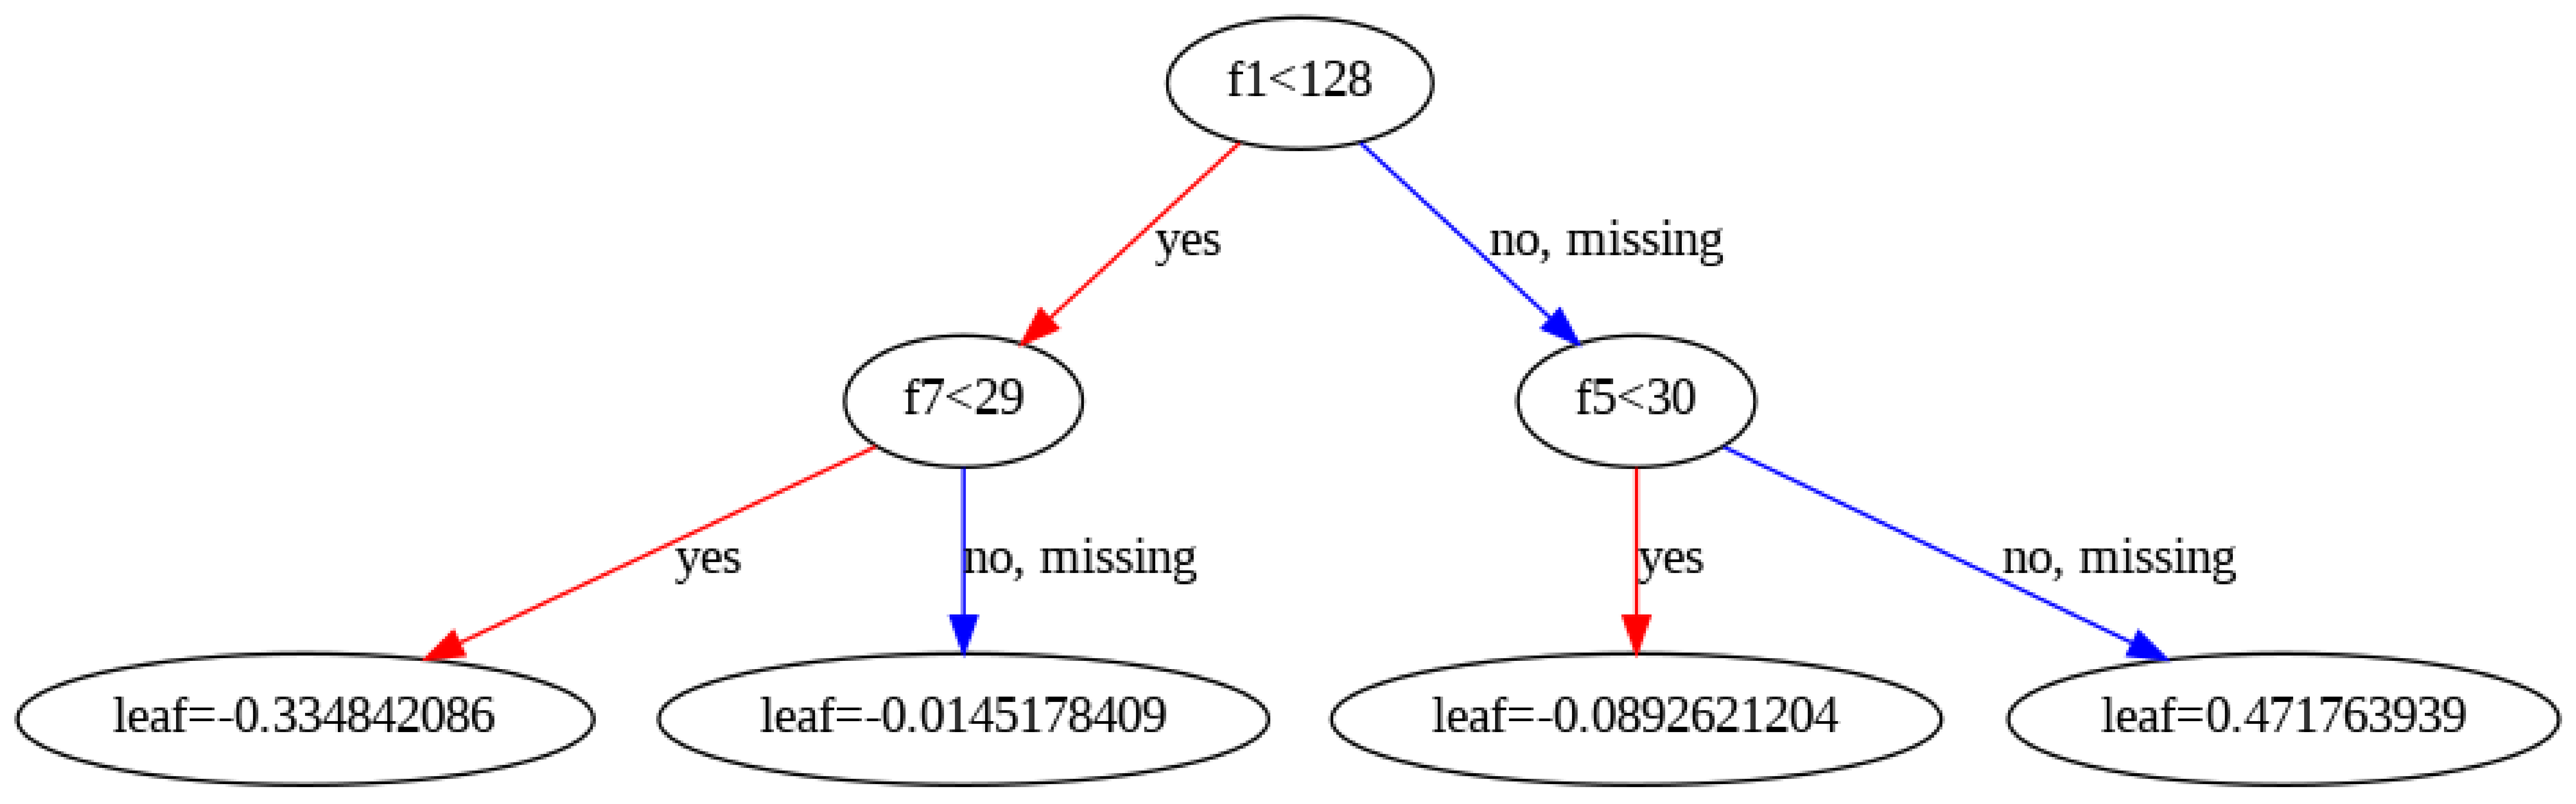

In [15]:
import os
os.environ["PATH"]+=(os.pathsep+'C:/Program Files (x86)/Graphiz2.38/bin/')
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=100,200
plot_tree(model)
plt.show()


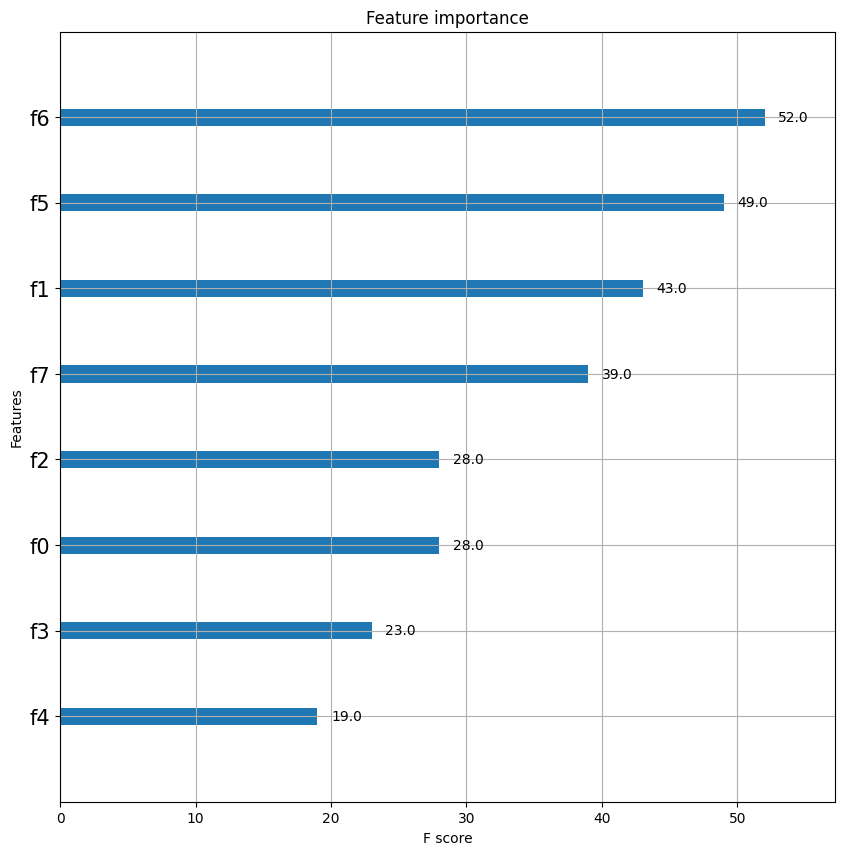

In [16]:
from xgboost import plot_importance
rcParams['figure.figsize']=10,10
plot_importance(model)
plt.yticks(fontsize=15)
plt.show()

In [17]:
!pip install pdpbox

In [34]:
print(type(dataset))  # 데이터 타입 확인

if not isinstance(dataset, pd.DataFrame):
    print("DataFrame으로 변환")
    feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
    dataset = pd.DataFrame(dataset, columns=feature_names)


<class 'pandas.core.frame.DataFrame'>


In [36]:
!pip install --upgrade pdpbox


In [38]:
from pdpbox import info_plots
print(dir(info_plots))


['FeatureInfo', 'InteractInfoPlotEngine', 'InteractPredictPlot', 'InteractTargetPlot', 'PredictPlot', 'PredictPlotEngine', 'TargetPlot', 'TargetPlotEngine', '_BaseInfoPlot', '_InfoPlot', '_InteractInfoPlot', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_calc_preds', '_check_classes', '_check_dataset', '_check_model', '_check_target', '_expand_params_for_interact', '_make_list', '_q1', '_q2', '_q3', 'pd', 'product']


In [ ]:
'''
from pdpbox import info_plots
pima_data=dataset
pima_features=dataset.columns[:8]
pima_target=dataset.columns[8]

fig, axes, summary_df= info_plots.TargetPlot(
    df=pima_data,
    feature='Glucose',
    feature_name='Glucose',
    target=pima_target
)
'''

In [48]:
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


In [ ]:
'''
from pdpbox import info_plots

# pima_data는 DataFrame, feature와 target은 문자열
plot_obj = info_plots.TargetPlot(
    df=pima_data,
    feature='Glucose',
    feature_name='Glucose',
    target='Outcome'
)
fig = plot_obj._plot
fig.show()
'''